In [1]:
!pip install mplsoccer
!pip install statsbombpy

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from matplotlib import animation
from mplsoccer import VerticalPitch, Pitch
from statsbombpy import sb
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


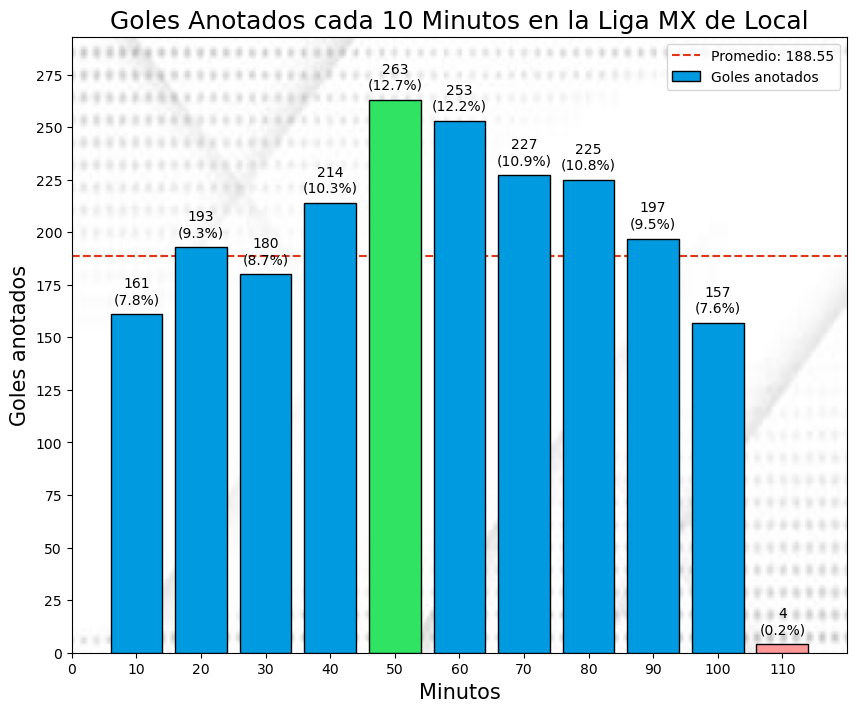

In [72]:

# Datos
lst_category = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
lst_values = [161, 193, 180, 214, 263, 253, 227, 225, 197, 157, 4]
Media_values = sum(lst_values) / len(lst_values) 
total_values = sum(lst_values)  

# Cargar la imagen y convertirla a RGB
img = Image.open(r"C:\Users\223106108\Desktop\Data Science\escudos\back.jpg").convert('RGB')

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Colocar la imagen en el fondo sin alterar sus colores
ax.imshow(img, aspect='auto', extent=[min(lst_category)-10, max(lst_category)+10, 0, max(lst_values)+30], zorder=-1)

# Configuración del color de las barras
colores = ['#ff9999' if valor == min(lst_values) else '#30e362' if valor == max(lst_values) else '#009ae0' for valor in lst_values]

# Configuración del gráfico de barras con contorno negro
width = 8
bars = ax.bar(lst_category, lst_values, width=width, color=colores, edgecolor='black', label="Goles anotados", zorder=3)

# Anotación del total y porcentaje de cada barra
for barra, valor in zip(bars, lst_values):
    yval = barra.get_height()
    percentage = (valor / total_values) * 100  # Cálculo del porcentaje
    # Texto que muestra valor y porcentaje
    ax.text(barra.get_x() + barra.get_width() / 2, yval + 5, f'{valor}\n({percentage:.1f}%)', ha='center')

# Añadiendo títulos y etiquetas
ax.set_title("Goles Anotados cada 10 Minutos en la Liga MX de Local", fontsize=18)
ax.set_xlabel("Minutos", fontsize=15)
ax.set_ylabel("Goles anotados", fontsize=15)

# Configuración de los ticks en y
ax.set_yticks(range(0, max(lst_values) + 25, 25))

# Añadiendo una línea para el promedio
ax.axhline(Media_values, color="#e03616", linestyle="--", label=f"Promedio: {Media_values:.2f}")

# Ajustando los ticks en x
ax.set_xticks(range(0, max(lst_category) + 10, 10))

# Mostrando la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

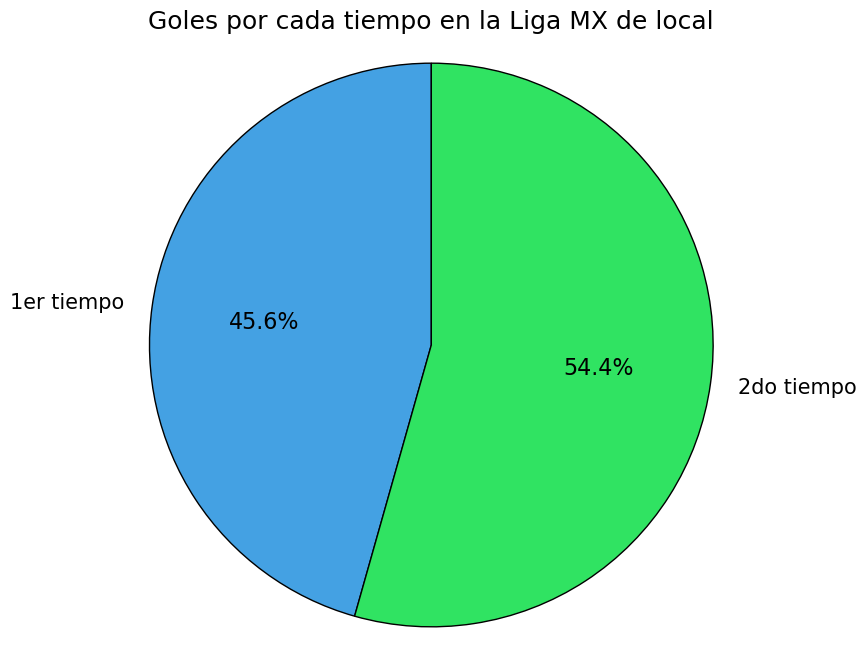

In [6]:

etiquetas = ['1er tiempo', '2do tiempo']
valores = [946, 1128]  

# Configura el gráfico de pastel
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(valores, labels=etiquetas, startangle=90,
                                    colors=['#44a1e3', '#30e362'], autopct='%1.1f%%',
                                    textprops={'fontsize': 15}) 
# Aladir contorno negro
for patch in patches:
    patch.set_edgecolor('black')
# Ajusta el aspecto para que parezca un círculo
plt.axis('equal')


# Añade título al gráfico
plt.title('Goles por cada tiempo en la Liga MX de local', fontsize=18)

# Cambia el color de los porcentajes a negro y ajusta el tamaño del texto de los porcentajes
for autotext in autotexts:
    autotext.set_color('black')  
    autotext.set_fontsize(16)  
# Muestra el gráfico de pastel
plt.show()

In [7]:
df_equipos = pd.read_excel(r"C:\Users\223106108\Desktop\Data Science\Tabla de goles local.xlsx",
                           sheet_name = "Goles por equipos")
df_equipos

,Equipo,Goles anotados
0,América,163
1,Santos Laguna,150
2,Toluca,140
3,Tigres UANL,139
4,León,135
5,Monterrey,132
6,Pachuca,126
7,Cruz Azul,124
8,Pumas UNAM,118
9,Guadalajara,108


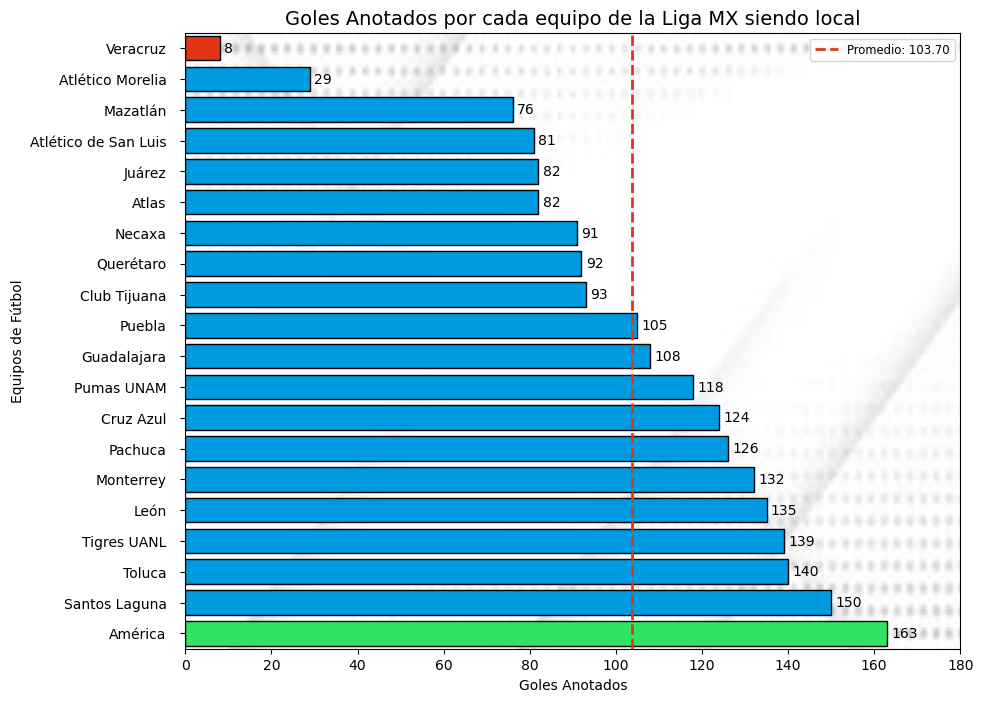

In [15]:
# Configurar el rango de goles (de 0 a 180, en intervalos de 20)
bins = list(range(0, 181, 20))

# Calcular el promedio de goles
promedio_goles = df_equipos['Goles anotados'].mean()

# Máximo y mínimo de goles
max_goles = df_equipos['Goles anotados'].max()
min_goles = df_equipos['Goles anotados'].min()

# Cargar la imagen y convertirla a RGB
img = Image.open(r"C:\Users\223106108\Desktop\Data Science\escudos\back.jpg").convert('RGB')

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Colocar la imagen en el fondo sin alterar sus colores
plt.imshow(img, aspect='auto', extent=[min(bins), max(bins), -0.5, len(df_equipos)-0.5], zorder=0)

# Crear el gráfico
plt.figure(figsize=(10, 8))
# Asignar colores condicionalmente para el valor mas grande y el mas chico
colors = ['#009ae0' if (value != max_goles and value != min_goles) 
          else '#30e362' if value == max_goles else '#e03616' for value in df_equipos['Goles anotados']]
# Contornos negros
bars = plt.barh(df_equipos['Equipo'], df_equipos['Goles anotados'], color=colors, edgecolor='black', zorder=1)
# Agregar los valores numéricos en cada barra
for i, (value, team) in enumerate(zip(df_equipos['Goles anotados'], df_equipos['Equipo'])):
    plt.text(value + 1, i, str(value), ha='left', va='center', fontsize=10)
# Agregar una línea vertical para representar el promedio y la leyenda
plt.axvline(promedio_goles, color='#e03616', linestyle='--', linewidth=2, label=f'Promedio: {promedio_goles:.2f}', zorder=2)

# Agregar etiquetas y título
plt.xlabel('Goles Anotados')
plt.ylabel('Equipos de Fútbol')
plt.title('Goles Anotados por cada equipo de la Liga MX siendo local', fontsize=14)

# Configurar el rango en el eje X y ajustar el espaciado de las etiquetas
plt.xticks(bins)
plt.tick_params(axis='y', which='major', pad=10)

# Mostrar la leyenda
plt.legend(fontsize='small')

# Mostrar el gráfico
plt.show()

In [16]:
df_jug = pd.read_excel(r"C:\Users\223106108\Desktop\Data Science\Tabla de goles local.xlsx", sheet_name = "Goles por jugador")
df_jug 

,Jugador,Goles anotados
0,A. Gignac,48
1,R. Funes Mori,41
2,C. González,35
3,N. Ibáñez,34
4,J. Rodríguez,33
5,J. Dinenno,31
6,Á. Mena,30
7,H. Martín,30
8,V. Dávila,26
9,G. Berterame,25


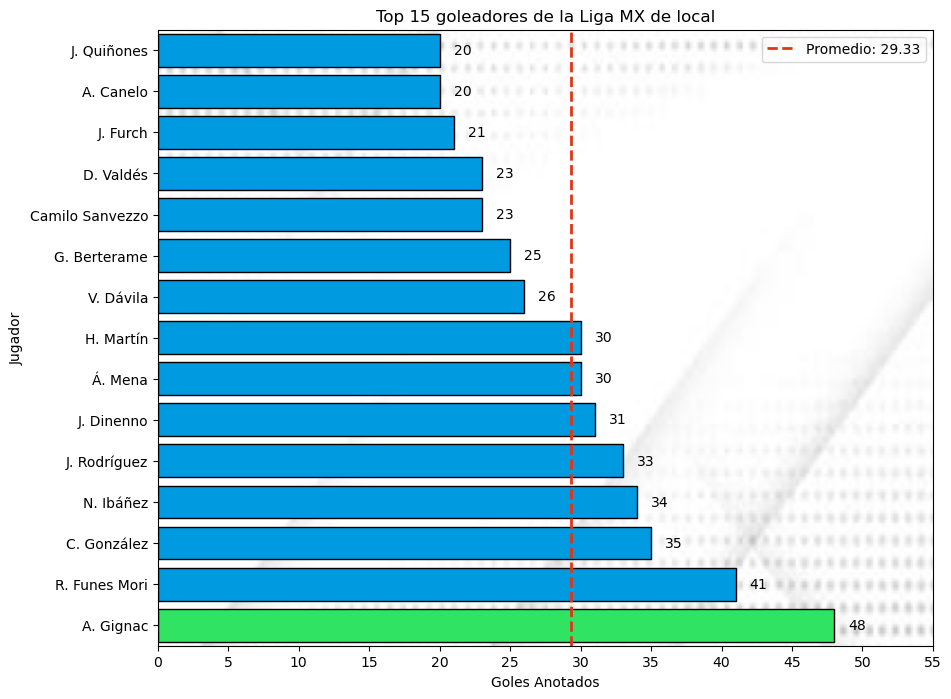

In [23]:
# Configurar el rango de goles (de 0 a 50, en intervalos de 5)
bins = list(range(0, 60, 5))

# Calcular el promedio de goles
promedio_goles = df_jug['Goles anotados'].mean()

# Máximo y mínimo de goles
max_goles = df_jug['Goles anotados'].max()
min_goles = df_jug['Goles anotados'].min()

# Cargar la imagen y convertirla a RGB
img = Image.open(r"C:\Users\223106108\Desktop\Data Science\escudos\back.jpg").convert('RGB')

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Colocar la imagen en el fondo sin alterar sus colores y estirarla para cubrir todo el rango del eje x
plt.imshow(img, aspect='auto', extent=[min(bins), max(bins), -0.5, len(df_jug)-0.5], zorder=0)

# Crear el histograma horizontal y agregar etiquetas en cada barra
colors = ['#009ae0' if value != max_goles else '#30e362' if value != min_goles or idx == len(df_jug) - 1 else '#e03616' for idx, value in enumerate(df_jug['Goles anotados'])]
bars = plt.barh(df_jug['Jugador'], df_jug['Goles anotados'], color=colors, edgecolor='black')
for index, value in enumerate(df_jug['Goles anotados']):
    plt.text(value+1, index, str(value), ha='left', va='center', fontsize=10, color='black')  # Asegura que los números sean negros

# Agregar una línea vertical para representar el promedio y la leyenda
plt.axvline(promedio_goles, color='#e03616', linestyle='--', linewidth=2, label=f'Promedio: {promedio_goles:.2f}', zorder=2)

# Configurar etiquetas y título
plt.xlabel('Goles Anotados')
plt.ylabel('Jugador')
plt.title('Top 15 goleadores de la Liga MX de local')

# Configurar el rango en el eje X
plt.xticks(bins)

# Mostrar la leyenda
plt.legend(fontsize='medium')

# Mostrar el gráfico
plt.show()

In [8]:
df_temp = pd.read_excel(r"C:\Users\223106108\Desktop\Data Science\Tabla de goles local.xlsx", 
                        sheet_name = "Goles por temporada")
df_temp

,Temporada,Goles anotados
0,Apertura 2019,299
1,Clausura 2019,137
2,Apertura 2020,235
3,Clausura 2020,227
4,Apertura 2021,203
5,Clausura 2021,231
6,Apertura 2022,255
7,Clausura 2022,245
8,Apertura 2023,242


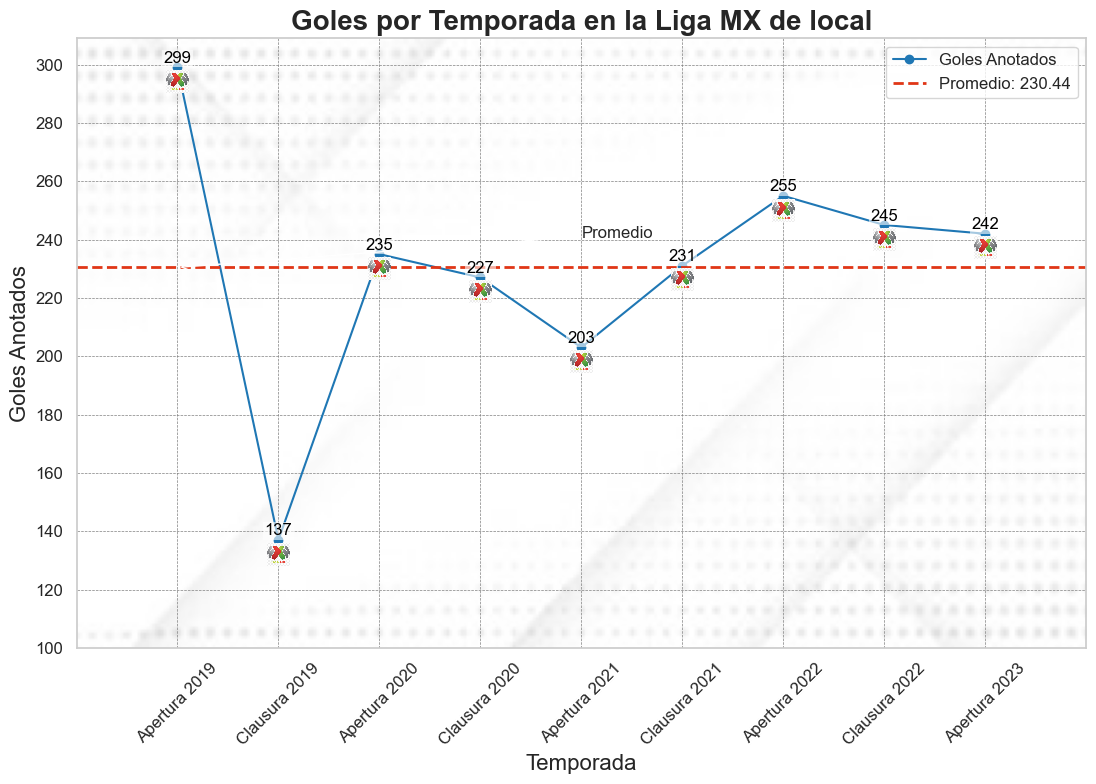

In [23]:
img_background = Image.open(r"C:\Users\223106108\Desktop\Data Science\escudos\back.jpg").convert('RGB')

# Cargar el logo de la Liga MX
logo_path = r"C:\Users\223106108\Desktop\Data Science\escudos\logo ligamx.png"
img_logo = Image.open(logo_path).convert('RGBA')

# Configuración de estilo general de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Añadir la imagen de fondo
plt.imshow(img_background, extent=[-1, len(df_temp), 100, max(df_temp['Goles anotados']) + 10], aspect='auto', alpha=0.5)

# Calcula el promedio de goles anotados
promedio_goles = df_temp['Goles anotados'].mean()

# Grafica los datos 
plt.plot(df_temp['Temporada'], df_temp['Goles anotados'], marker='o', linestyle='-', color='#1f77b4', label='Goles Anotados')

# Título y etiquetas con fuentes más grandes y en negrita
plt.title('Goles por Temporada en la Liga MX de local', fontsize=20, fontweight='bold')
plt.xlabel('Temporada', fontsize=16)
plt.ylabel('Goles Anotados', fontsize=16)

# Rotación de etiquetas en el eje x para mejor legibilidad
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Configurar los ticks del eje y para que comiencen en 100 y aumenten en incrementos de 20
start_y = 100
increment_y = 20
end_y = max(df_temp['Goles anotados']) + 10
yticks = list(range(start_y, int(end_y) + 1, increment_y))
plt.yticks(ticks=yticks)

# Añadir una línea horizontal para el promedio
plt.axhline(promedio_goles, color="#e03616", linestyle="--", label=f"Promedio: {promedio_goles:.2f}", linewidth=2)

# Añadir el logo en cada punto 
for i, (season, goals) in enumerate(zip(df_temp['Temporada'], df_temp['Goles anotados'])):
    imagebox = OffsetImage(img_logo, zoom=0.05)
    ab = AnnotationBbox(imagebox, (i, goals - 5), frameon=False) 
    plt.gca().add_artist(ab)

# Añadir valor de anotaciones para cada punto de datos
for i, txt in enumerate(df_temp['Goles anotados']):
    plt.text(i, df_temp['Goles anotados'][i] + 0.5, f'{txt}', ha='center', va='bottom', fontsize=12, color='black', 
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))
plt.legend(fontsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Eliminar la cuadrícula secundaria para una vista más limpia
plt.minorticks_off()

# Asegurarse de que los límites del eje x no se corten con la imagen de fondo
plt.xlim(-1, len(df_temp))
plt.ylim(100, max(df_temp['Goles anotados']) + 10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [24]:
df_desem = pd.read_excel(r"C:\Users\223106108\Desktop\Data Science\Tabla de goles local.xlsx", sheet_name = "Desempeño de equipos")
df_desem

,Temporada,América,Atlas,Atlético de San Luis,Atlético Morelia,Club Tijuana,Cruz Azul,Guadalajara,Juárez,León,...,Necaxa,Pachuca,Puebla,Pumas UNAM,Querétaro,Santos Laguna,Tigres UANL,Toluca,Veracruz,Grand Total
0,Apertura 2019,24,9,7,22.0,14,17,15,12,18,...,21,13,11,15,17,27,17,10,8.0,299
1,Clausura 2020,4,4,7,7.0,6,13,8,9,13,...,8,5,4,11,5,8,9,11,NaN,137
2,Apertura 2020,19,5,9,NaN,9,16,14,6,19,...,10,11,13,21,14,13,17,14,NaN,235
3,Clausura 2021,18,10,10,NaN,11,22,9,8,14,...,6,14,11,6,13,24,10,19,NaN,227
4,Apertura 2021,14,10,7,NaN,7,11,9,9,18,...,10,10,13,11,7,13,18,14,NaN,203
5,Clausura 2022,16,13,12,NaN,10,10,19,7,10,...,8,21,14,14,10,14,18,11,NaN,231
6,Apertura 2022,24,10,4,NaN,8,16,6,11,16,...,10,27,13,11,9,24,15,26,NaN,255
7,Clausura 2023,19,14,9,NaN,9,9,15,8,15,...,9,18,14,16,10,12,16,19,NaN,245
8,Apertura 2023,25,7,16,NaN,19,10,13,12,12,...,9,7,12,13,7,15,19,16,NaN,242


In [25]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

C:\Users\223106108\AppData\Local\Temp\ipykernel_16600\2083004566.py:47: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


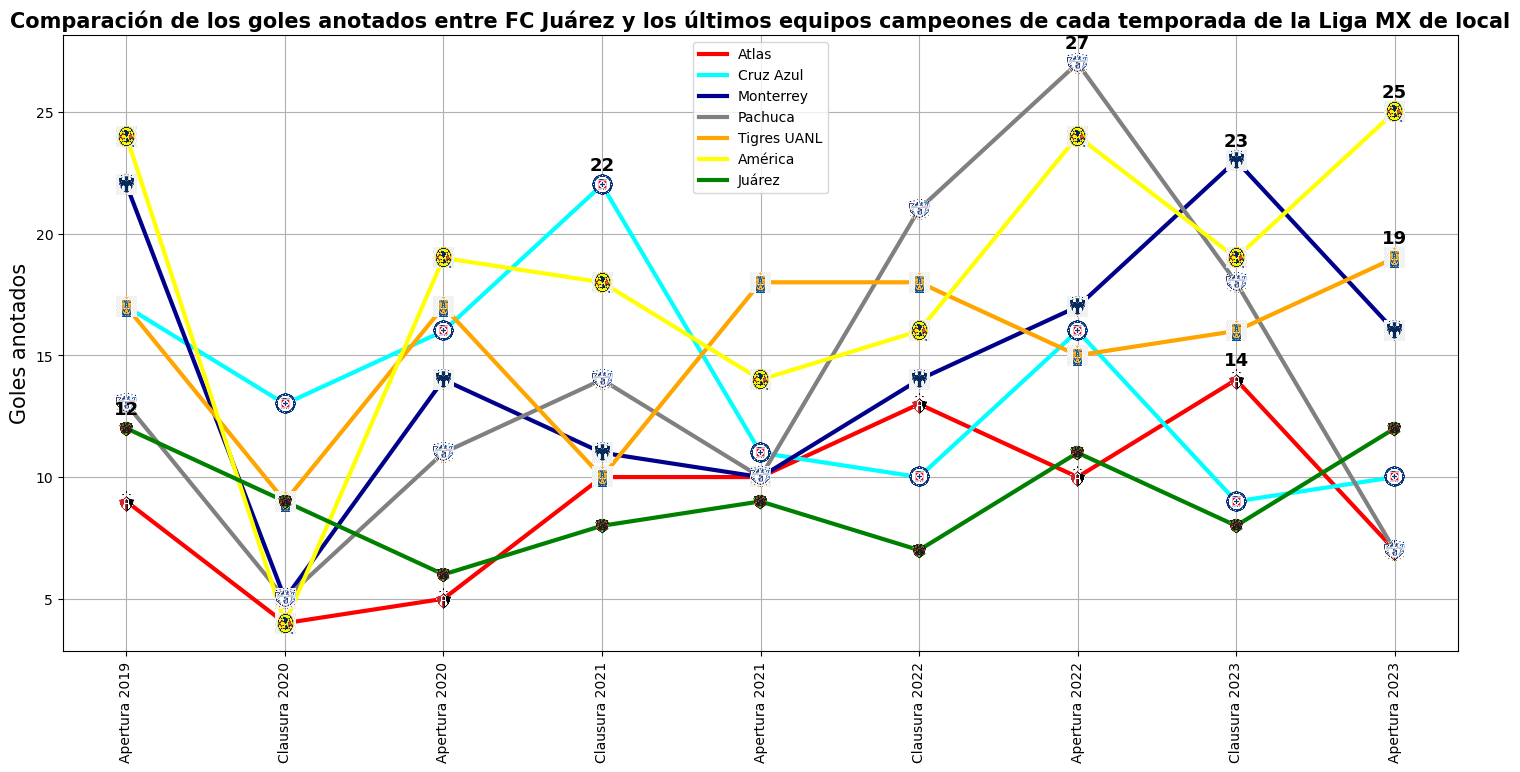

In [31]:

# Cargar imágenes de escudos 
escudos = {
    'Atlas': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\atlas.png'),
    'Cruz Azul': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\cruz azul.png'),
    'Monterrey': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\monterrey.png'),
    'Pachuca': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\pachuca.png'),
    'Tigres UANL': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\tigres.png'),
    'América': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\america.png'),
    'Juárez': plt.imread(r'C:\Users\223106108\Desktop\Data Science\escudos\fc juarez.png'),
}

plt.figure(figsize=(18, 8))

# Definir colores para cada equipo
colores = {
    'Atlas': 'red',
    'Cruz Azul': 'cyan',
    'Monterrey': 'darkblue',
    'Pachuca': 'gray',
    'Tigres UANL': 'orange',
    'América': 'yellow',
    'Juárez': 'green',
}

equipos = ['Atlas', 'Cruz Azul', 'Monterrey', 'Pachuca', 'Tigres UANL', 'América', 'Juárez']
for equipo in equipos:
    plt.plot(df_desem["Temporada"], df_desem[equipo], label=equipo, linewidth=3, color=colores[equipo])

# Calcular el promedio de goles por temporada
df_desem['Promedio'] = df_desem[equipos].mean(axis=1)

# Definir un tamaño común para todas las imágenes
target_size = (100, 100)

# Ajustar el tamaño de las imágenes para que sean más grandes
zoom_factor = 0.15

# Agregar imágenes en cada punto de la línea después de redimensionarlas
for temporada in df_desem["Temporada"]:
    for equipo in equipos:
        x = temporada
        y = df_desem.at[df_desem[df_desem["Temporada"] == temporada].index[0], equipo]
        
        # Convertir el array de NumPy a una imagen PIL
        img_array = escudos[equipo]
        img = Image.fromarray((img_array * 255).astype(np.uint8))
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Agregar la imagen al gráfico con el zoom ajustado
        imagebox = OffsetImage(img, zoom=zoom_factor)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0, xycoords='data', boxcoords="data")
        plt.gca().add_artist(ab)

# Añadir el valor máximo de goles para cada equipo
for equipo in equipos:
    max_goles = df_desem[equipo].max()
    temporada_max = df_desem[df_desem[equipo] == max_goles]["Temporada"].values[0]
    plt.text(temporada_max, max_goles + 0.8, str(max_goles), ha='center', va='center', fontsize=13, color="black",fontweight='bold')

# Configurar etiquetas y título
plt.xticks(rotation=90)
plt.ylabel('Goles anotados', fontsize=15)
plt.legend()
plt.title("Comparación de los goles anotados entre FC Juárez y los últimos equipos campeones de cada temporada de la Liga MX de local",fontsize=15, fontweight='bold')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

In [126]:
df_exam = pd.read_excel(r"C:\Users\223106108\Desktop\Data Science\Tabla de goles Local.xlsx", sheet_name = "Coordenadas de goles")

In [1]:
df_exam
x_val=[value for value in df_exam["x"]]
y_val=[value for value in df_exam["y"]]


NameError: name 'df_exam' is not defined

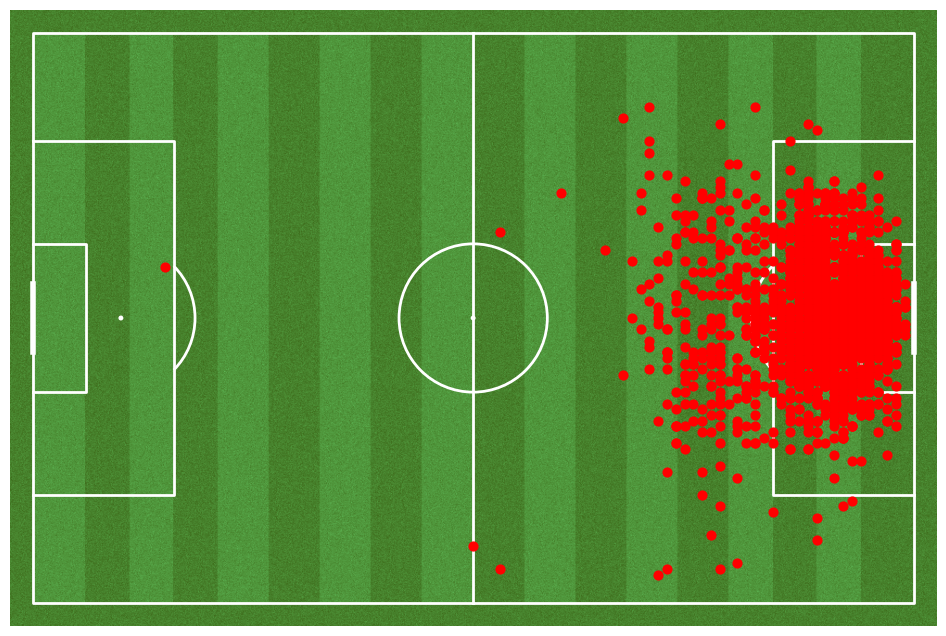

In [132]:
# Crea la figura y los ejes utilizando 
fig, ax = plt.subplots(figsize=(16, 8))
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, pitch_type="wyscout")
# Dibuja el campo de fútbol en los ejes 'ax'
pitch.draw(ax=ax)
# Dibuja los puntos dispersos sobre el campo de fútbol 
pitch.scatter(x_val, y_val, color='red', ax=ax, s=40)

# Muestra el gráfico
plt.show()